In [1]:
# Load libraries for basic computing 
import numpy as np
import pandas as pd

# Load libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load libraries for visualization
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("isedol_total_cleanse.csv")
print(df)

           user  index_months  year  month  date  weekday date_formatting  \
0        vo_ine            15  2022      3    14        1       3/14/2022   
1        vo_ine            15  2022      3    13        7       3/13/2022   
2        vo_ine            15  2022      3    12        6       3/12/2022   
3        vo_ine            15  2022      3    11        5       3/11/2022   
4        vo_ine            15  2022      3    10        4       3/10/2022   
..          ...           ...   ...    ...   ...      ...             ...   
972  woowakgood             9  2021      9     8        3        9/8/2021   
973  woowakgood             9  2021      9     7        2        9/7/2021   
974  woowakgood             9  2021      9     6        1        9/6/2021   
975  woowakgood             9  2021      9     5        7        9/5/2021   
976  woowakgood             9  2021      9     4        6        9/4/2021   

                                            stream_url  length_minute  \
0 

In [3]:
# 날짜 관련 변수
# year
# month
# date
# Index_month : 월별 순서
# date_formatting : 정식규격 날짜(MM/DD/YYYY)
# weekday : 요일

# 기타 등등
# stream_url : 스트리밍 주소
# Cattegory : 방송 카테고리
# co_stream : 합방 여부
# event : 이벤트 여부

# 시청 정보
# length_minute : 분길이
# watchtime_hrs: 분단위
# avg_viewer : 평균 시청자 수
# peak_viewer : 최고점 시청자 수
# new_followers : 새 팔로워
# followers_hourly : 시간당 새 팔로워 수
# views : 시청수
# views_hourly : 시간당 시청수


,index_months,year,month,date,weekday,length_minute,watchtime_hrs,avg_viewers,peak_viewers,new_followers,followers_hourly,views,views_hourly,co_stream,event
index_months,1.00,0.84,-0.69,-0.14,-0.04,-0.02,0.39,0.51,0.52,0.45,0.47,0.50,0.63,NaN,NaN
year,0.84,1.00,-0.97,-0.13,-0.02,-0.02,0.38,0.49,0.50,0.53,0.53,0.50,0.62,NaN,NaN
month,-0.69,-0.97,1.00,0.11,0.01,0.01,-0.34,-0.43,-0.44,-0.51,-0.50,-0.46,-0.55,NaN,NaN
date,-0.14,-0.13,0.11,1.00,0.03,-0.05,0.01,0.03,0.01,0.00,0.05,-0.02,0.01,NaN,NaN
weekday,-0.04,-0.02,0.01,0.03,1.00,0.11,0.04,0.00,0.02,0.05,0.00,0.09,0.05,NaN,NaN
length_minute,-0.02,-0.02,0.01,-0.05,0.11,1.00,0.47,0.20,0.25,0.43,-0.18,0.50,0.05,NaN,NaN
watchtime_hrs,0.39,0.38,-0.34,0.01,0.04,0.47,1.00,0.92,0.93,0.47,0.15,0.91,0.70,NaN,NaN
avg_viewers,0.51,0.49,-0.43,0.03,0.00,0.20,0.92,1.00,0.98,0.42,0.31,0.83,0.82,NaN,NaN
peak_viewers,0.52,0.50,-0.44,0.01,0.02,0.25,0.93,0.98,1.00,0.47,0.33,0.88,0.84,NaN,NaN
new_followers,0.45,0.53,-0.51,0.00,0.05,0.43,0.47,0.42,0.47,1.00,0.71,0.65,0.54,NaN,NaN


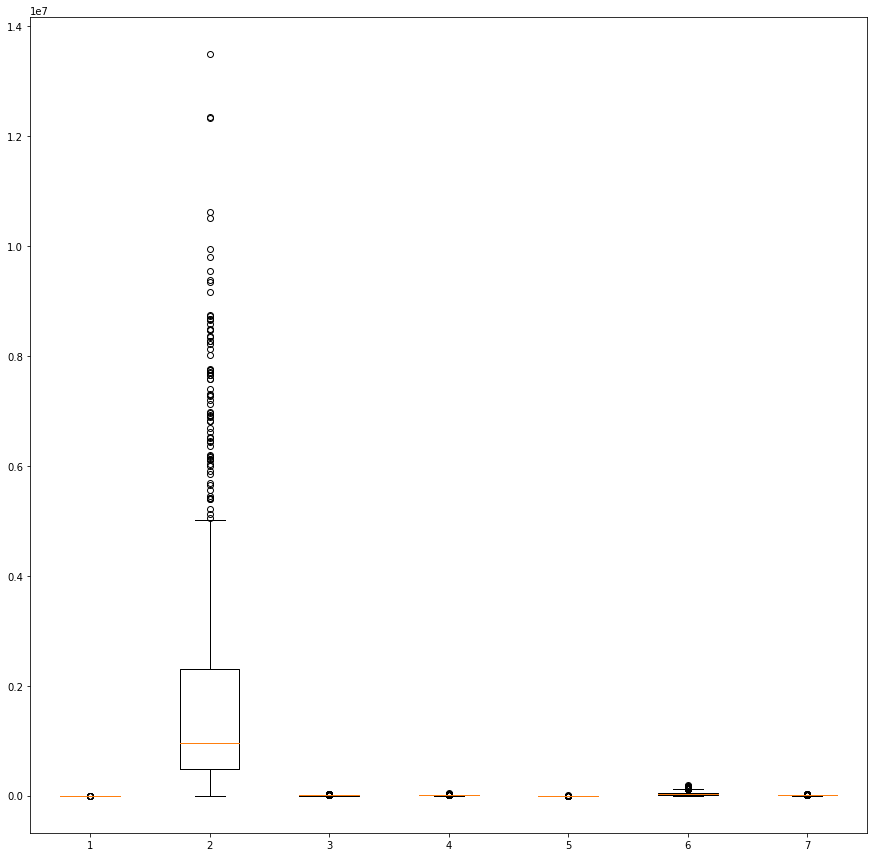

In [14]:
#plt.boxplot(df.views)
#plt.boxplot(df.avg_viewers)

plt.boxplot([df.length_minute, df.watchtime_hrs, df.avg_viewers, df.peak_viewers, df.new_followers, df.views, df.views_hourly])
plt.show()

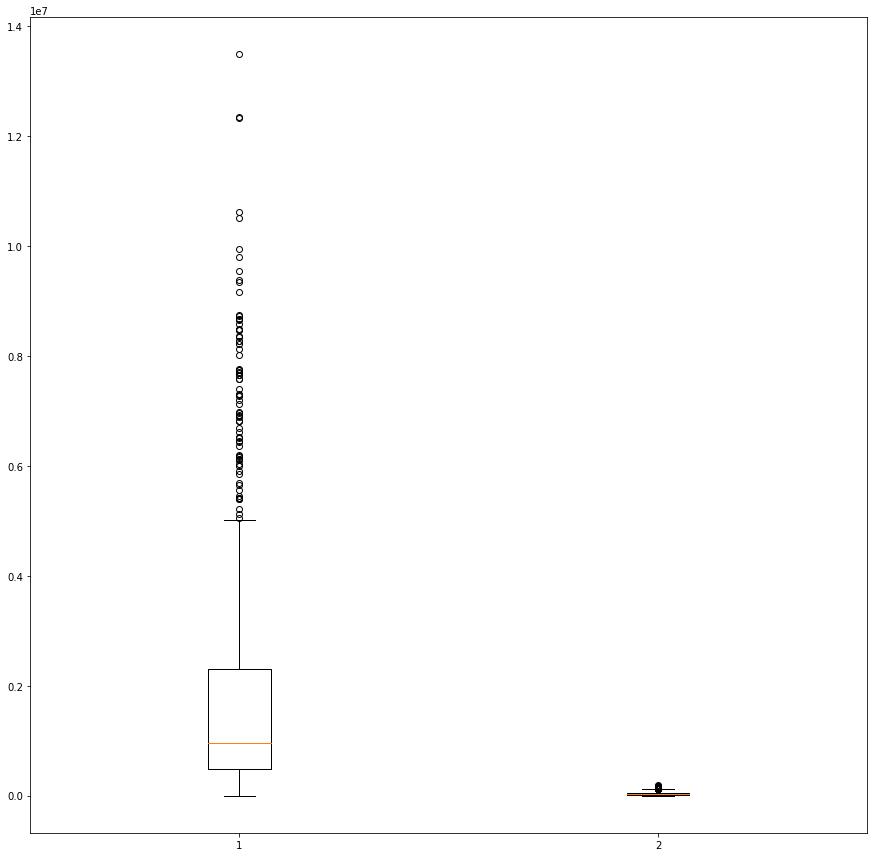

In [15]:
plt.boxplot([df.watchtime_hrs, df.views])
plt.show()

In [13]:
#Correlation 한눈에 편하게 보기(근데 레이아웃 많이 안 좋음)
s = corr_df.unstack()
s

index_months  index_months        1.00
              year                0.84
              month              -0.69
              date               -0.14
              weekday            -0.04
                                  ... 
event         followers_hourly     NaN
              views                NaN
              views_hourly         NaN
              co_stream            NaN
              event                NaN
Length: 225, dtype: float64

<AxesSubplot:>

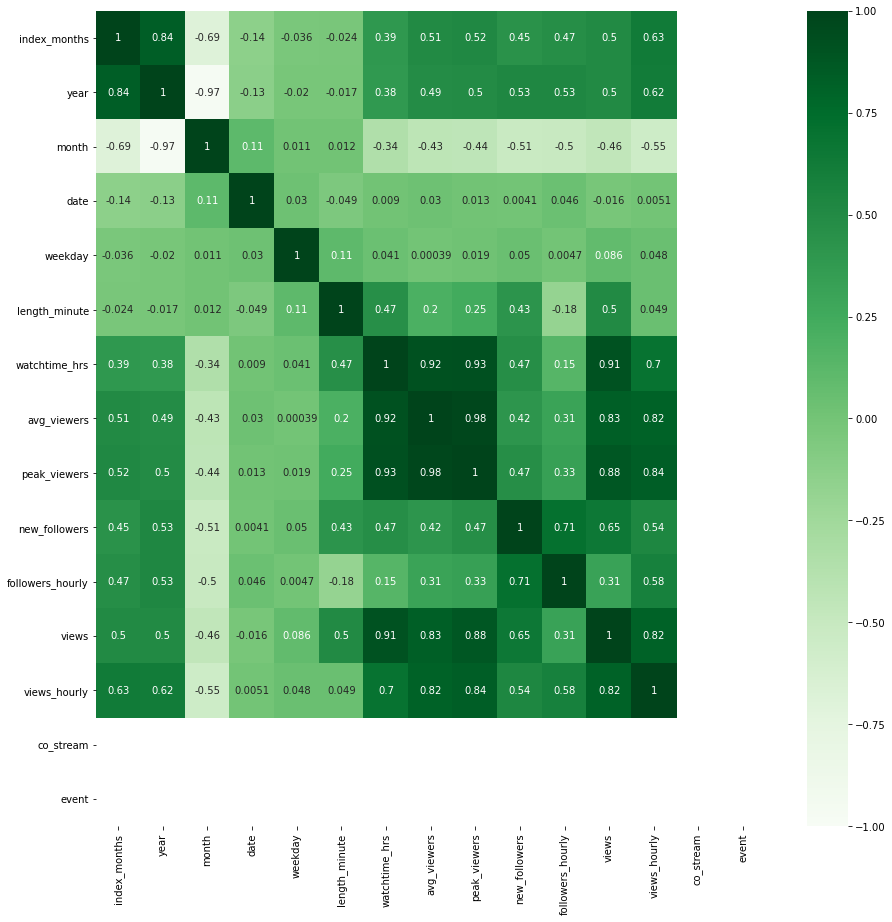

In [6]:
plt.rcParams["figure.figsize"] = (15,15)
sb.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [ ]:
df = df[['date_formatting','watchtime_hrs','avg_viewers','new_followers','views']]
df['lscrap'] = np.log(df['scrap'])
df = df.dropna()
#df = df[df.index!=30]
df = panelDF(df,id='fcode',time='year')
df = df.outer_balance()
df